<a href="https://colab.research.google.com/github/Dhilip546/PyroEyes-Alert-System/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Dense,GlobalAveragePooling2D

In [ ]:
import tensorflow as tp
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1./255,
                                  zoom_range = 0.2,
                                  shear_range = 0.2 ,#tilts the image
                                  horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/data/fire_dataset',
                                                  target_size = (64,64),
                                                 batch_size = 32,

                                                 class_mode ='binary')


Found 999 images belonging to 2 classes.


In [ ]:

training_set.class_indices


{'fire_images': 0, 'non_fire_images': 1}

In [ ]:
test_datagen = ImageDataGenerator(rescale =1./255,
                                  zoom_range = 0.2,
                                  shear_range = 0.2, #tilts the image
                                  horizontal_flip = True)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data',
                                                  target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode ='binary')



Found 651 images belonging to 2 classes.


In [ ]:
test_set.class_indices

{'fire_images': 0, 'non_fire_images': 1}

In [ ]:
from tensorflow import keras
cnn = keras.Sequential()
#first conv2d
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=[64,64,3]))
cnn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
#second conv2d
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128,activation='relu'))
cnn.add(keras.layers.Dense(164,activation='relu'))
cnn.add(keras.layers.Dense(1,activation='sigmoid'))

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=15)


Epoch 1/15
32/32 [==============================] - 300s 9s/step - loss: 0.3706 - accuracy: 0.8398 - val_loss: 2.4114 - val_accuracy: 0.2857
Epoch 2/15
32/32 [==============================] - 39s 1s/step - loss: 0.1928 - accuracy: 0.9129 - val_loss: 2.3764 - val_accuracy: 0.3303
Epoch 3/15
32/32 [==============================] - 38s 1s/step - loss: 0.1229 - accuracy: 0.9540 - val_loss: 3.0424 - val_accuracy: 0.2811
Epoch 4/15
32/32 [==============================] - 37s 1s/step - loss: 0.1458 - accuracy: 0.9419 - val_loss: 1.5764 - val_accuracy: 0.5730
Epoch 5/15
32/32 [==============================] - 37s 1s/step - loss: 0.1158 - accuracy: 0.9530 - val_loss: 1.3764 - val_accuracy: 0.6759
Epoch 6/15
32/32 [==============================] - 38s 1s/step - loss: 0.1107 - accuracy: 0.9630 - val_loss: 2.8713 - val_accuracy: 0.2965
Epoch 7/15
32/32 [==============================] - 36s 1s/step - loss: 0.1085 - accuracy: 0.9620 - val_loss: 1.5631 - val_accuracy: 0.6452
Epoch 8/15
32/32 [=

<Axes: >

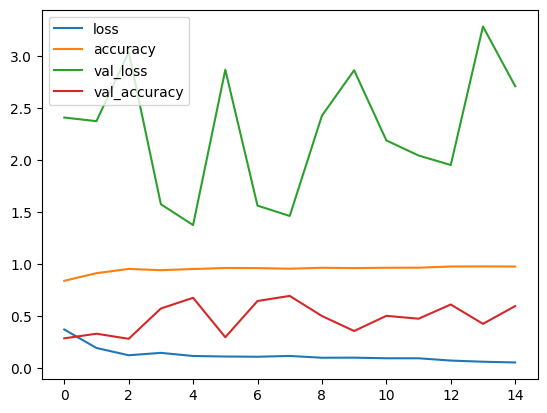

In [ ]:

import pandas as pd
pd.DataFrame(model_history.history).plot()


In [ ]:
from keras.utils import load_img,img_to_array
test=load_img('Downloads/cat.jpeg',target_size=(64,64))
test


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import requests
from PIL import Image
from io import BytesIO

# Specify the URL of the image you want to load
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmulIVB_O--rAlz2umGQ5QtBTXqEXxJryzYA&usqp=CAU'

# Fetch the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Resize the image to the target size (e.g., 64x64)
img = img.resize((64, 64))

# Convert the image to a NumPy array
test= img_to_array(img)


In [ ]:
import numpy as np
test=(np.expand_dims(test, axis=0))
test.shape


(1, 64, 64, 3)

In [ ]:
result = cnn.predict(test)


1/1 [==============================] - 0s 32ms/step


In [ ]:

if result[0][0] == 1:
    prediction='non fire'
else:
    prediction ='fire'
print(prediction)


non fire


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from PIL import Image


In [ ]:
cnn.save('cnn.h5')  # Replace 'fire_detection_model.h5' with the desired file name


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('cnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.models import load_model

model = load_model('cnn.h5')  # Replace with your model file name


In [ ]:
!pip install opencv-python

cap = cv2.VideoCapture(0)  # 0 for the default camera, adjust if needed


In [ ]:
while True:
    ret, frame = cap.read()  # Read a frame from the camera
    if not ret:
        break  # Break the loop if frame capture fails

    # Preprocess the captured frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    frame = cv2.resize(frame, (64, 64))  # Resize to match your model's input size
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(frame)

    # Get the predicted class (0 or 1)
    predicted_class = int(round(prediction[0][0]))

    # Display the frame with the predicted class
    if predicted_class == 1:
        cv2.putText(frame, 'Fire Detected', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        cv2.putText(frame, 'No Fire', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Fire Detection', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    print("Camera is accessible.")
    cap.release()
else:
    print("Failed to access the camera.")


Failed to access the camera.
